In [371]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as pyo


In [372]:
data = pd.read_csv("/Users/furkandurmus/Desktop/Kaggle Projects/Car Prediction/CarPrice_Assignment.csv")
data_copy = data.copy()
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## **Dataset Preparation And Processing**

In [373]:
data.info()
print("-----")
data.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

object     10
int64       8
float64     8
dtype: int64

In [374]:
data.shape

(205, 26)

In [375]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [376]:
data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [377]:
companyname = data["CarName"].apply(lambda x: x.split(" ")[0])
data.insert(2,"companyname", companyname)
data.drop(["CarName"], axis= 1, inplace=True)
data.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [378]:
companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [379]:
data["companyname"] = data["companyname"].str.lower()

def rename(a,b): 

    data["companyname"].replace(a,b, inplace=True)

rename("maxda", "mazda")
rename("Nissan", "nissan")
rename("porsche", "porcshce")
rename("toyouta", "toyota")
rename("vokswagen","volkswagen")
rename("vw", "volkswagen")

data.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porcshce', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [380]:
data_car_group = data[["companyname"]]
data_car_group = data_car_group["companyname"].value_counts().reset_index()
data_car_group.columns = ["names", "values"]

fig = px.pie(data_car_group, values="values", names="names")
fig.show()


In [381]:
car_price = data[["companyname", "price"]]
car_price_mean = car_price.groupby("companyname")[["price"]].mean().sort_values(by="price", ascending=False).reset_index(drop=False)

fig = px.histogram(car_price_mean, x="companyname", y="price", color="companyname", template="plotly_dark")
fig.show()


In [382]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   companyname       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [383]:


fig = make_subplots(rows=2, cols=3)

fig.add_trace(go.Histogram(x=data['fueltype'], name='Fuel Type'), row=1, col=1)
fig.add_trace(go.Histogram(x=data['carbody'], name='Car Body'), row=1, col=2)
fig.add_trace(go.Histogram(x=data['drivewheel'], name='Drive Wheel'), row=1, col=3)
fig.add_trace(go.Histogram(x=data['aspiration'], name='Aspiration'), row=2, col=1)
fig.add_trace(go.Histogram(x=data['fuelsystem'], name='Fuel System'), row=2, col=2)
fig.add_trace(go.Histogram(x=data['enginetype'], name='Engine Type'), row=2, col=3)

fig.update_layout(height=700, width=1100, title_text="Multiple Subplots")
fig.show()


In [384]:
def rename(a,b): 

    data["symboling"].replace(a,b, inplace=True)

rename(3, "Very Risky")
rename(2, "Risky")
rename(1, "Moderately Risky")
rename(0, "Less Risky")
rename(-1,"Less Risky Still")
rename(-2, "Safe")
rename(-3, "Very Safe")

data.symboling.unique()

fig1 = px.histogram(data, x="symboling",color="symboling")
fig1.show()

fig2 = px.box(data, x="symboling", y="price")
fig2.show()

In [385]:

fig = px.scatter(data_frame=data, x='price', y='horsepower', 
                 color='companyname', 
                 hover_data=['car_ID', 'carbody', 'fueltype', 'aspiration'],
                 title='Horsepower vs Price by Company',
                 template='plotly_dark')

fig.show()


In [386]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("City MPG vs Horsepower", "Highway MPG vs Horsepower", "City MPG vs Price", "Highway MPG vs Price"))

fig.add_trace(go.Scatter(x=data['horsepower'], y=data['citympg'], mode='markers', name='City MPG by Horse Power', marker=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=data['horsepower'], y=data['highwaympg'], mode='markers', name='Highway MPG by Horse Power', marker=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=data['price'], y=data['citympg'], mode='markers', name='City MPG by Price', marker=dict(color='green')), row=2, col=1)
fig.add_trace(go.Scatter(x=data['price'], y=data['highwaympg'], mode='markers', name='Highway MPG by Price', marker=dict(color='purple')), row=2, col=2)

fig.update_layout(height=600, width=1000, title="MPG vs Horsepower And Price", xaxis_title="Horsepower", yaxis_title="MPG")
fig.show()


data['fueleconomy'] = (0.55 * data['citympg']) + (0.45 * data['highwaympg'])

In [387]:
data['price'] = data['price'].astype('int')
temp = data.copy()
table = temp.groupby(['companyname'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='companyname')
bins = [0,10000,20000,40000]
data_bin=['Budget','Medium','Highend']
data['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=data_bin)
data.head()

,car_ID,symboling,companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,Very Risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,Very Risky,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,Moderately Risky,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,Risky,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,Risky,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


In [388]:
cars_lin_reg = data[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]

def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

cars_lin_reg = dummies('fueltype',cars_lin_reg)
cars_lin_reg = dummies('aspiration',cars_lin_reg)
cars_lin_reg = dummies('carbody',cars_lin_reg)
cars_lin_reg = dummies('drivewheel',cars_lin_reg)
cars_lin_reg = dummies('enginetype',cars_lin_reg)
cars_lin_reg = dummies('cylindernumber',cars_lin_reg)
cars_lin_reg = dummies('carsrange',cars_lin_reg)
    

cars_lin_reg.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


## **Linear Regression For Car Dataset**

In [389]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df_train, df_test = train_test_split(cars_lin_reg, train_size=0.8, test_size=0.2, random_state=42)

min_max_scaler = MinMaxScaler()
x = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[x] = min_max_scaler.fit_transform(df_train[x])


In [390]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,164.0,0.201217,0.192299,0.0,0.064241,0.137245,0.283197,1.0
wheelbase,164.0,0.418230,0.205824,0.0,0.272414,0.350000,0.534483,1.0
curbweight,164.0,0.328188,0.227831,0.0,0.153093,0.268580,0.498554,1.0
enginesize,164.0,0.220370,0.158082,0.0,0.109375,0.193359,0.277344,1.0
boreratio,164.0,0.557753,0.192690,0.0,0.435714,0.550000,0.714286,1.0
horsepower,164.0,0.223310,0.170458,0.0,0.082627,0.182203,0.271186,1.0
fueleconomy,164.0,0.392856,0.192030,0.0,0.219183,0.366718,0.523883,1.0
carlength,164.0,0.509094,0.208285,0.0,0.380603,0.491379,0.665517,1.0
carwidth,164.0,0.392625,0.202235,0.0,0.226190,0.352381,0.464286,1.0
gas,164.0,0.908537,0.289150,0.0,1.000000,1.000000,1.000000,1.0


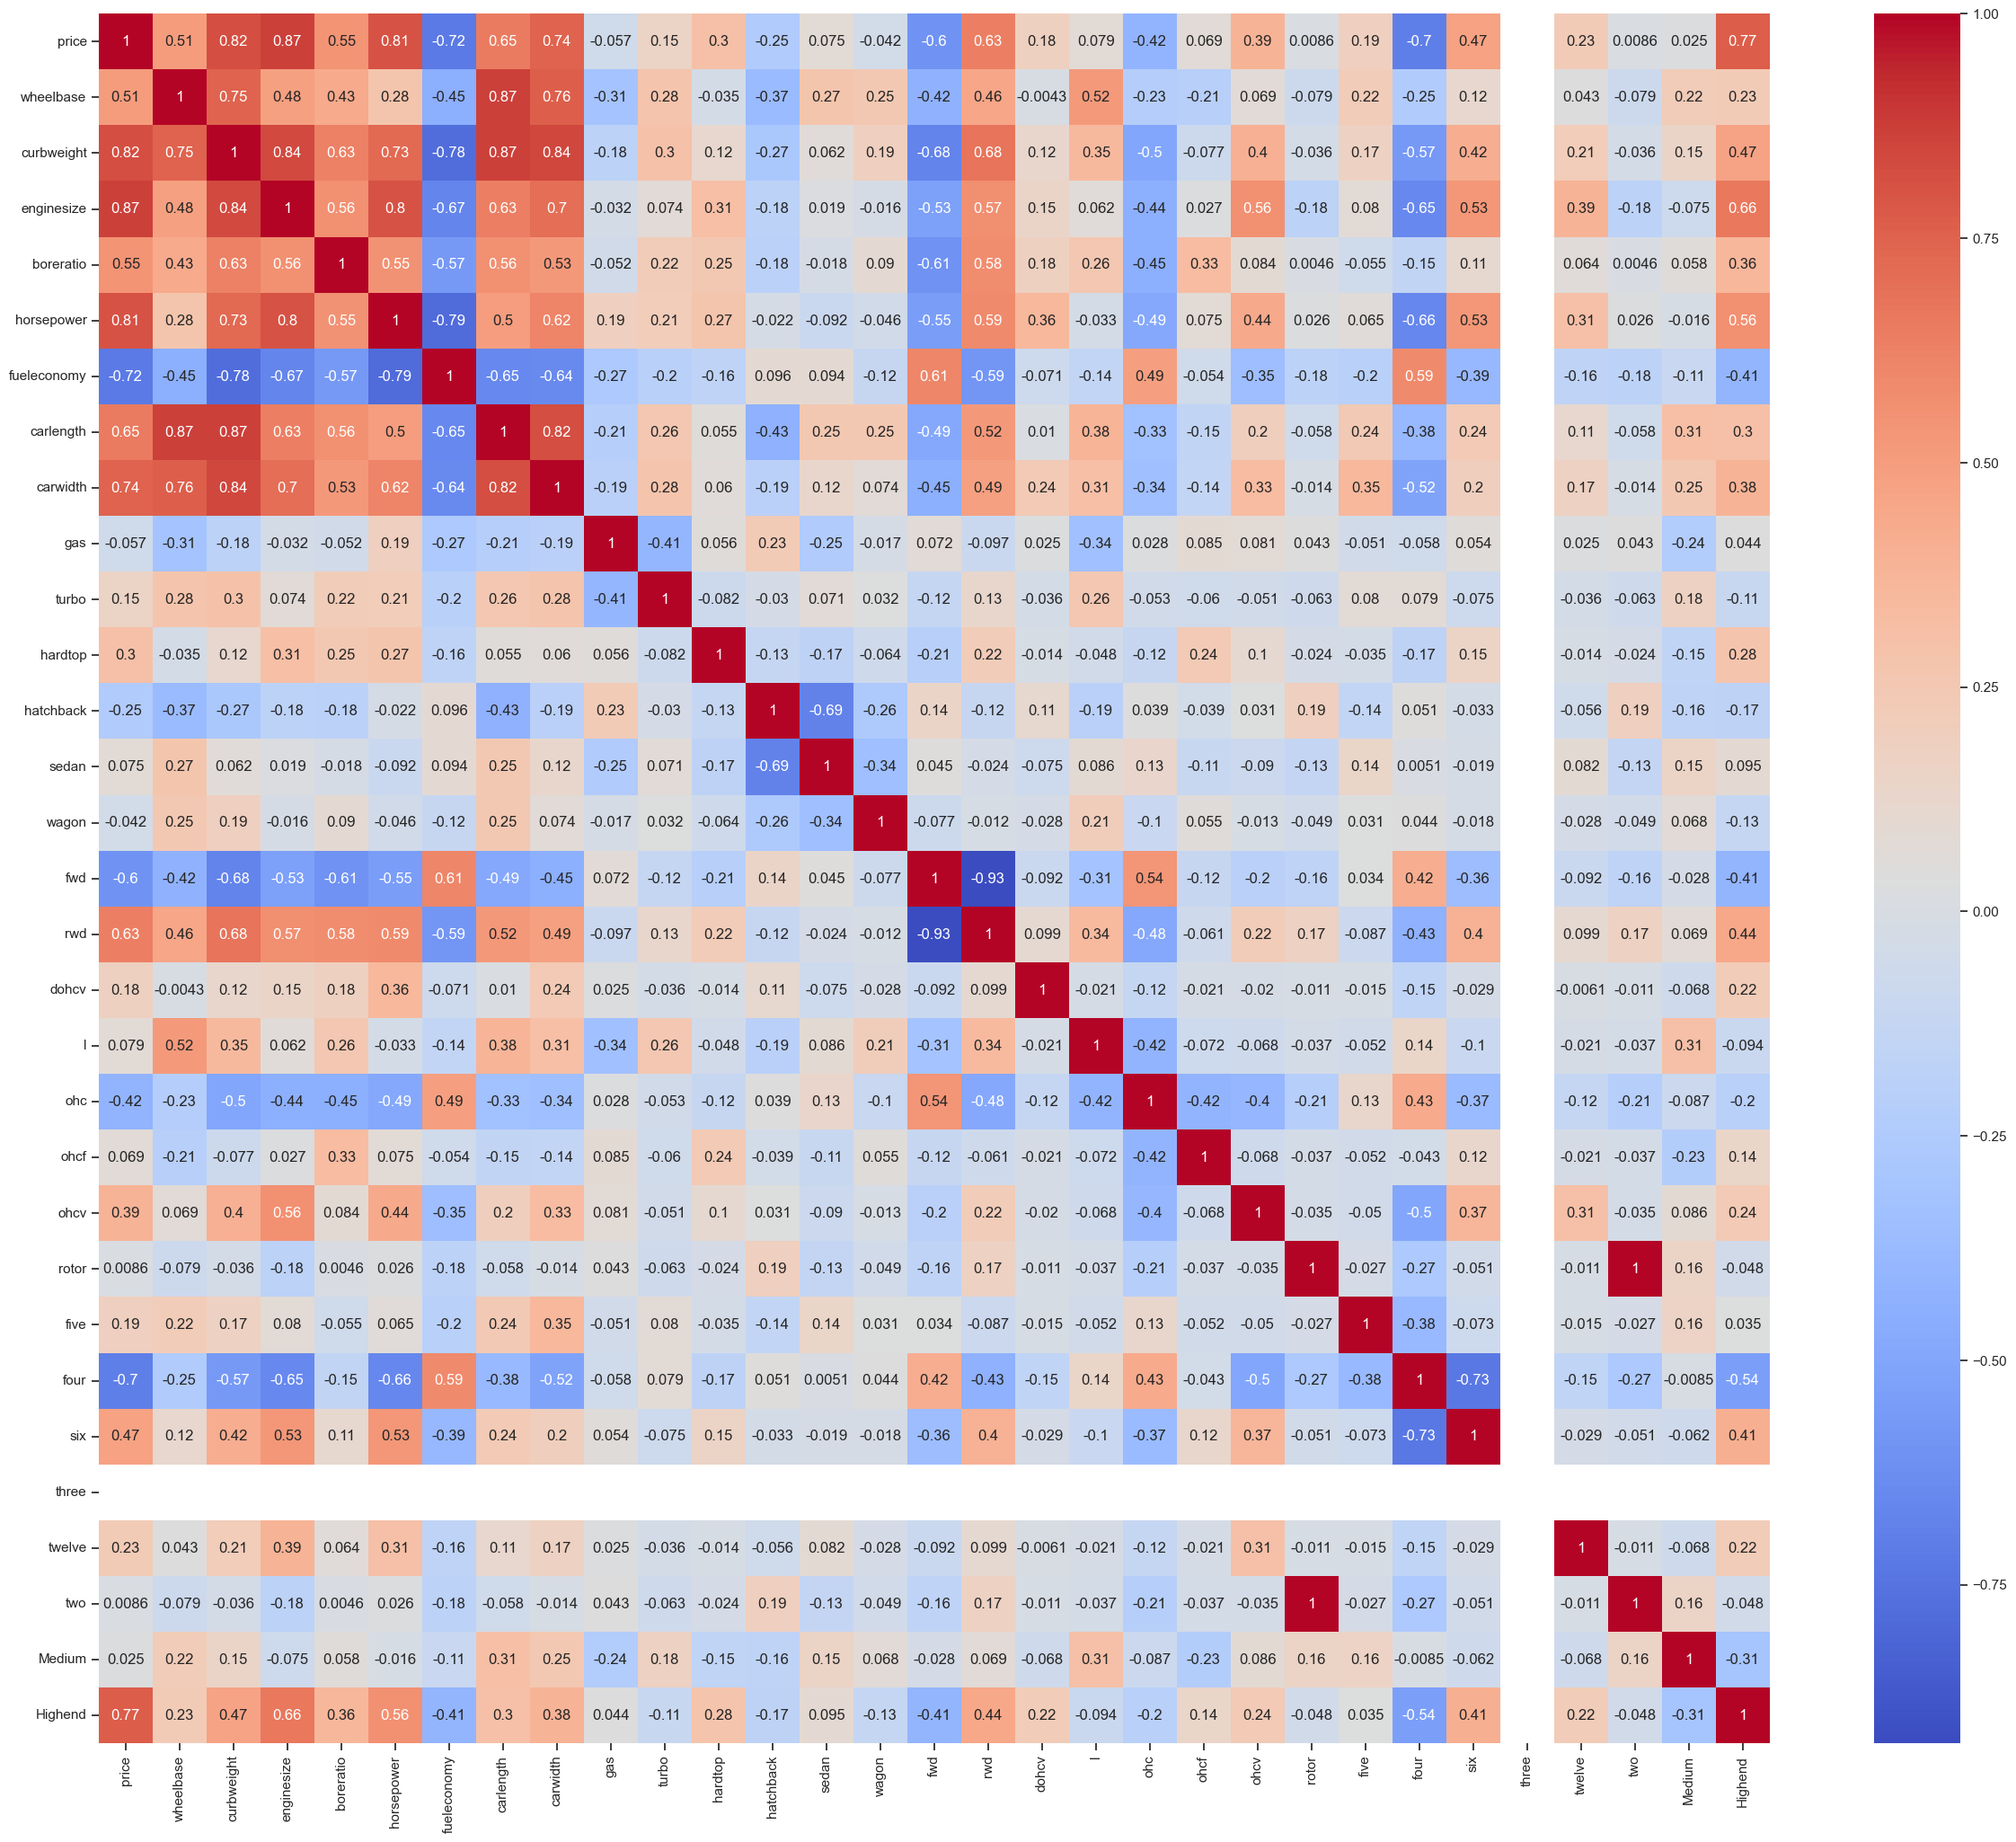

In [391]:
corr = df_train.corr()

plt.figure(figsize = (30, 25))
sns.heatmap(corr, annot = True, cmap="coolwarm")
plt.show()


In [392]:
y_train = df_train.pop("price")
x_train = df_train

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression